In [4]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [5]:
# 获取苹果公司的股票数据
ticker = "AAPL"
data = yf.download(ticker, start="2012-01-01", end="2024-03-31")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416983,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483710,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622312,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754258,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734029,394024400
...,...,...,...,...,...,...
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.046646,71106600
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.618591,54288300
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.480133,57388400


# 蜡烛上下

In [6]:

upShadow = high - np.maximum(op,close)
upShadow_norm = upShadow.div(upShadow.rolling(5).mean()).dropna(axis=0,how='all')
downShadow = np.minimum(op,close) - low 
downShadow_norm = downShadow.div(downShadow.rolling(5).mean()).dropna(axis=0,how='all')

upShadow_norm_mean = upShadow_norm.rolling(20).mean().dropna(axis=0,how='all')
upShadow_norm_std = upShadow_norm.rolling(20).std().dropna(axis=0,how='all')
downShadow_norm_mean = downShadow_norm.rolling(20).mean().dropna(axis=0,how='all')
downShadow_norm_std = downShadow_norm.rolling(20).std().dropna(axis=0,how='all')


# 计算信息系数
def calculate_ic(factor_scores, future_returns):
    """计算信息系数"""
    ic, _ = spearmanr(factor_scores, future_returns)
    return ic

ic_values = []
for series in aligned_factors:
    ic = calculate_ic(series, future_returns)
    ic_values.append(ic)

excess_panel = pd.Series(ic_values, index=['upShadow_norm_mean', 'upShadow_norm_std', 'downShadow_norm_mean', 'downShadow_norm_std'])
excess_panel.plot(kind='bar', figsize=(8, 4))
plt.xlabel('Factors')
plt.ylabel('Information Coefficient (IC)')
plt.title('Information Coefficient of Factors')
plt.show()


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


# 确保因子序列和未来收益序列对齐


# 可视化信息系数



KeyError: "[Timestamp('2012-01-03 00:00:00'), Timestamp('2012-01-04 00:00:00'), Timestamp('2012-01-05 00:00:00'), Timestamp('2012-01-06 00:00:00'), Timestamp('2012-01-09 00:00:00'), Timestamp('2012-01-10 00:00:00'), Timestamp('2012-01-11 00:00:00'), Timestamp('2012-01-12 00:00:00'), Timestamp('2012-01-13 00:00:00'), Timestamp('2012-01-17 00:00:00'), Timestamp('2012-01-18 00:00:00'), Timestamp('2012-01-19 00:00:00'), Timestamp('2012-01-20 00:00:00'), Timestamp('2012-01-23 00:00:00'), Timestamp('2012-01-24 00:00:00'), Timestamp('2012-01-25 00:00:00'), Timestamp('2012-01-26 00:00:00'), Timestamp('2012-01-27 00:00:00'), Timestamp('2012-01-30 00:00:00'), Timestamp('2012-01-31 00:00:00'), Timestamp('2012-02-01 00:00:00'), Timestamp('2012-02-02 00:00:00'), Timestamp('2012-02-03 00:00:00')] not in index"

未来单日收益率：预测一天后的收益。
未来多日收益率：预测多天后的累计收益。
未来滚动收益率：使用一个滚动窗口计算未来一段时间的平均收益。

# 威廉修正

In [9]:
import pandas as pd
from scipy.stats import spearmanr


Wup = high - close
Wup_norm = Wup.div(Wup.rolling(5).mean()).dropna(axis=0,how='all')
Wdown = close - low
Wdown_norm = Wdown.div(Wdown.rolling(5).mean()).dropna(axis=0,how='all')

Wup_mean = Wup_norm.rolling(20).mean().dropna(axis=0,how='all')
Wup_std = Wup_norm.rolling(20).std().dropna(axis=0,how='all')
Wdown_mean = Wdown_norm.rolling(20).mean().dropna(axis=0,how='all')
Wdown_std = Wdown_norm.rolling(20).std().dropna(axis=0,how='all')

In [10]:

def calculate_ic(factor_scores, future_returns):
    """计算信息系数"""
    ic, p_value = spearmanr(factor_scores, future_returns)
    return ic

# 计算每个序列的信息系数
ic_values = []
for series in [upShadow_norm_mean, upShadow_norm_std, downShadow_norm_mean, downShadow_norm_std]:
    ic = calculate_ic(series, future_returns)
    ic_values.append(ic)

# 将IC值转换成Pandas Series对象，并绘制柱状图
excess_panel = pd.Series(ic_values, index=['upShadow_norm_mean', 'upShadow_norm_std', 'downShadow_norm_mean', 'downShadow_norm_std'])
excess_panel.plot(kind='bar', figsize=(8, 4))


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3056 and the array at index 1 has size 3074

<Axes: >

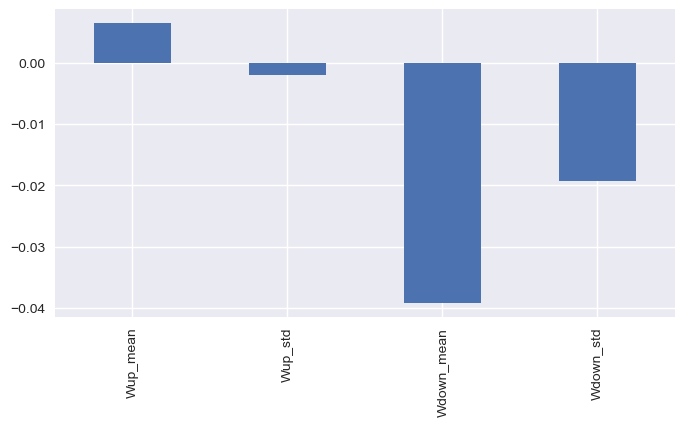

In [5]:
import pandas as pd
from scipy.stats import spearmanr


Wup = high - close
Wup_norm = Wup.div(Wup.rolling(5).mean()).dropna(axis=0,how='all')
Wdown = close - low
Wdown_norm = Wdown.div(Wdown.rolling(5).mean()).dropna(axis=0,how='all')

Wup_mean = Wup_norm.rolling(20).mean().dropna(axis=0,how='all')
Wup_std = Wup_norm.rolling(20).std().dropna(axis=0,how='all')
Wdown_mean = Wdown_norm.rolling(20).mean().dropna(axis=0,how='all')
Wdown_std = Wdown_norm.rolling(20).std().dropna(axis=0,how='all')

def calculate_ic(factor_scores, future_returns):
    """计算信息系数"""
    ic, p_value = spearmanr(factor_scores, future_returns)
    return ic

# 计算每个序列的信息系数
ic_values = []
for series in [upShadow_norm_mean, upShadow_norm_std, downShadow_norm_mean, downShadow_norm_std]:
    ic = calculate_ic(series, future_returns)
    ic_values.append(ic)

# 将IC值转换成Pandas Series对象，并绘制柱状图
excess_panel = pd.Series(ic_values, index=['upShadow_norm_mean', 'upShadow_norm_std', 'downShadow_norm_mean', 'downShadow_norm_std'])
excess_panel.plot(kind='bar', figsize=(8, 4))

excess_panel = []
for i in [Wup_mean,Wup_std,Wdown_mean,Wdown_std]:
    ic = qt.IC_analysis(i,interval=5)
    ic.RankIC()
    excess_panel.append(ic.RankIC)

excess_panel = pd.concat(excess_panel,axis=1)
excess_panel.columns = ['Wup_mean','Wup_std','Wdown_mean','Wdown_std']
excess_panel.mean().plot(kind='bar',figsize=(8,4))

# UBL

In [8]:
mv = pd.read_pickle(r"D:\实习\研报复现\stockData\pv\stock_mv.pkl").stack()

def neutral(fct):
    res = []
    for idx in tqdm(fct.index):
        temp = pd.concat([fct.loc[idx],mv.loc[idx]],axis=1).dropna()

        X = temp.iloc[:,1:]
        X = sm.add_constant(X)
        y = temp.iloc[:,0]

        # 创建模型
        model = sm.OLS(y, X)

        # 拟合模型
        results = model.fit()

        res.append(results.resid)

    fctNeu = qt.zscore(pd.concat(res,axis=1).T)
    fctNeu.index = fct.index
    return fctNeu

In [9]:
mv = pd.read_pickle(r"D:\实习\研报复现\stockData\pv\stock_mv.pkl").stack()

def neutral(fct):
    res = []
    for idx in tqdm(fct.index):
        temp = pd.concat([fct.loc[idx],mv.loc[idx]],axis=1).dropna()

        X = temp.iloc[:,1:]
        X = sm.add_constant(X)
        y = temp.iloc[:,0]

        # 创建模型
        model = sm.OLS(y, X)

        # 拟合模型
        results = model.fit()

        res.append(results.resid)

    fctNeu = qt.zscore(pd.concat(res,axis=1).T)
    fctNeu.index = fct.index
    return fctNeu
UBL = neutral(-Wdown_mean)+neutral(-downShadow_norm_mean)

  0%|          | 0/3680 [00:00<?, ?it/s]

  0%|          | 0/3680 [00:00<?, ?it/s]

In [10]:
mv = pd.read_pickle(r"D:\实习\研报复现\stockData\pv\stock_mv.pkl").stack()

def neutral(fct):
    res = []
    for idx in tqdm(fct.index):
        temp = pd.concat([fct.loc[idx],mv.loc[idx]],axis=1).dropna()

        X = temp.iloc[:,1:]
        X = sm.add_constant(X)
        y = temp.iloc[:,0]

        # 创建模型
        model = sm.OLS(y, X)

        # 拟合模型
        results = model.fit()

        res.append(results.resid)

    fctNeu = qt.zscore(pd.concat(res,axis=1).T)
    fctNeu.index = fct.index
    return fctNeu
UBL = neutral(-Wdown_mean)+neutral(-downShadow_norm_mean)
ic = qt.IC_analysis(UBL,interval=20)
ic.RankIC()
print(ic.RankIC.mean())

0.03187288932029513


清除ST
清除涨跌停
获取交易面板完成
开始分层回测...
开始计算分层超额...


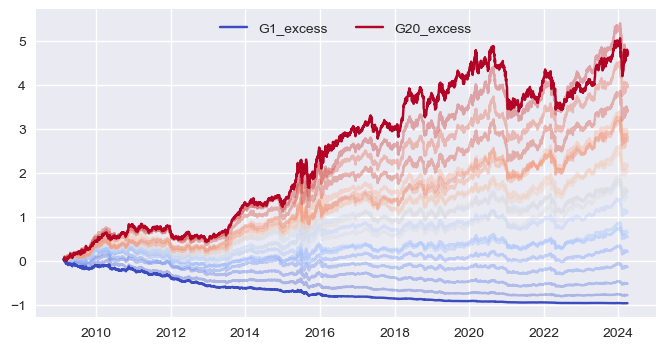

              Return (%)    Vol (%)      SR    Max Drawdown (%)    Drawdown Period    Winning Rate (%)    Calmar    Turnover(%)
----------  ------------  ---------  ------  ------------------  -----------------  ------------------  --------  -------------
2009-12-31         30.67      24.37   1.258               -8.53                 23               60.92       3.6        17485.1
2010-12-31          -2.7      19.15  -0.141              -14.23                141               54.45     -0.19          19871
2011-12-31        -15.13       16.5  -0.917              -15.89                191               49.22     -0.95        19809.2
2012-12-31        -10.18      15.99  -0.637              -11.22                191               51.04     -0.91        14795.8
2013-12-31         28.51      14.31   1.993               -7.64                 17               59.36      3.73        2763.59
2014-12-31          1.05      14.84   0.071              -13.61                 43               55.44  

In [14]:
mv = pd.read_pickle(r"D:\实习\研报复现\stockData\pv\stock_mv.pkl").stack()

def neutral(fct):
    res = []
    for idx in tqdm(fct.index):
        temp = pd.concat([fct.loc[idx],mv.loc[idx]],axis=1).dropna()

        X = temp.iloc[:,1:]
        X = sm.add_constant(X)
        y = temp.iloc[:,0]

        # 创建模型
        model = sm.OLS(y, X)

        # 拟合模型
        results = model.fit()

        res.append(results.resid)

    fctNeu = qt.zscore(pd.concat(res,axis=1).T)
    fctNeu.index = fct.index
    return fctNeu
UBL = neutral(-Wdown_mean)+neutral(-downShadow_norm_mean)
ic = qt.IC_analysis(UBL,interval=20)
ic.RankIC()
print(ic.RankIC.mean())
a = qt.alpha(UBL,freq='W',layer=20,verbose=True)
a.backtest()
a.plot_excess()
a.print_performance()

In [15]:
UBL.astype(np.float32).reset_index(names='date').to_feather('UBL.feather')